# K-Means Clustering Solution


In [7]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np

Let us generate and plot the dataset

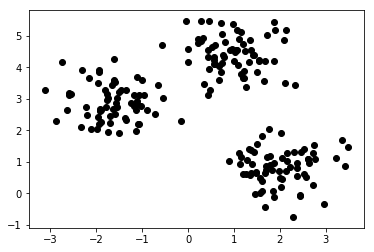

In [8]:
X,y = make_blobs(n_samples=200,centers=3,cluster_std=0.60,random_state=0)
'''The above line is to generate the dataset of random co-ordinates with specified standard deviation'''
plt.figure()
plt.scatter(X[:,0],X[:,1],c='black')
plt.show()

Let us use __Euclidean distance__ as a distance measure for our algorithm.</br>

In [9]:
def computeDistance(x1,x2):
    '''return the distance between the points x1 and x2'''
    return np.sqrt(np.sum(np.power((x1-x2),2)))
    

Run the below cell. It should give you an answer of $2.236$

In [10]:
print(computeDistance(np.array([5,4]),np.array([3,3])))

2.2360679775


Now we will randomly initialize our centroids

In [12]:
def randomInit(X,no_of_clusters,no_of_samples,nof):
    '''This function should initialize the centroids to any random sample(co-ordinate). Return the centroids as a matrix
    Note: The number of centroids to be randomly generated is no_of_clusters'''
    centroids = []
    for i in range(no_of_clusters):
        temp = np.random.randint(0,no_of_samples)
        tempcents = []
        for j in range(nof):
            tempcents.append(X[temp,j])
        centroids.append(tempcents)
    centroids = np.matrix(centroids)
    return centroids

The below function should label/assign the given data sample to its nearest centroid determined by __Euclidean Distance__.

In [13]:
def labelling(x,centroids):
    '''x: a data point
       centroids: a matrix of centroids
       return the label (a number between 0 and number_of_clusters-1) to which the point x belongs.'''
    distances = {}
    for i in range(len(centroids)):
        distances[computeDistance(x,centroids[i,:])] = i
    return distances[min(distances.keys())]

Running the below cell should return the label of value $2$.

In [14]:
tempCentroids = np.matrix([[5,6],[6,9],[4,4]])
print(labelling(np.matrix([3,2]),tempCentroids))

2


Now let us assign centroids for all data samples. <br>
(Call the above labelling function to all data samples)

In [8]:
def clusterAssignment(X,clusters,centroids):
    '''X : Data matrix
       clusters : A numpy array of size no_of_samples
       centroids : A numpy array of size no_of_clusters'''
    for i in range(len(X)):
        clusters[i] = labelling(X[i,:],centroids)
    return clusters

We will now compute the mean of all the points(data samples) assigned to a particular centroid.<br> Then set that mean as our new Centroid.

In [9]:
def updateCentroid(X,clusters,centroids,nof):
    '''X : data matrix
       clusters: a numpy array where the value at ith index is the label of centroid to which ith data sample currently belongs.
       centroids : matrix of centroids
       nof: number of features
       return updated centroids'''
    sums = np.matrix(np.zeros(centroids.shape))
    count = np.zeros(len(centroids),dtype=int)
    newCentroids = np.matrix(np.zeros(centroids.shape))
    for i in range(len(X)):
        for j in range(nof):
            sums[clusters[i],j]+=X[i,j]
        count[clusters[i]]+=1
    for i in range(len(centroids)):
        newCentroids[i,:] = sums[i,:]/count[i]
    return newCentroids


Now let us devise _K-Means_ Algorithm by making use of above methods.<br>
Do th following steps until convergence or for specified number of iterations.<br>
1. Cluster Assignment : Assign every point to its nearest centroid (_clusterAssignment_ function).
2. Update the Centroids : Compute the mean of each cluster and update it as the new centroid. (_updateCentroid_ function).


In [10]:
def kmeans_call(X,clusters,centroids,iterations,nof):
    '''Run the specified steps 'iterations' times '''
    for i in range(iterations):
        clusters = clusterAssignment(X,clusters,centroids)
        new_centroids = updateCentroid(X,clusters,centroids,nof)     
        centroids = new_centroids
    return centroids,clusters

Now let us plot the clustered samples.

In [11]:
def plotCentroids(Centroids):
    '''Plot the converged Centroids (yellow color)'''
    color = 'y'
    for i in range(len(Centroids)):
        plt.scatter(Centroids[i,0],Centroids[i,1],c=color)

def plotClusters(Centroids,Clusters,X):
    '''Plot the data samples with different colors for different clusters'''
    colors = ['r','g','b','cyan']
    plt.figure()
    for i in range(len(Clusters)):
        plt.scatter(X[i,0],X[i,1],c = colors[Clusters[i]])
    plotCentroids(Centroids)
    plt.show()

Call the kmeans method and plot the samples.

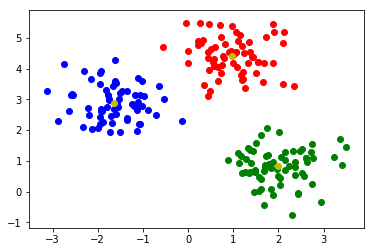

In [17]:
number_of_samples = 200  
number_of_clusters = 3
number_of_iterations = 100
number_of_features = 2
centroids = randomInit(X,number_of_clusters,number_of_samples,number_of_features) 
clusters = np.zeros(len(X),dtype=int)
(finalCentroids,finalClusters) = kmeans_call(X,clusters,centroids,number_of_iterations,number_of_features)
plotClusters(finalCentroids,finalClusters,X)

Vary number of samples,number of clusters and dispersion (std deviation) and see the result.
<div class="alert alert-block alert-success">Thank You</div>

<div class="alert alert-block alert-info">Regards<br>Pradeep Pai<br>Linux Campus Club, SJCE</div>